In [1]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])
casino_fig['week_day'] = casino_fig['Date'].dt.dayofweek

In [4]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands,week_day
0,2022-01-01,27,2226.567576,67021.396083,3398,5
1,2022-01-02,12,1816.774205,41186.835186,3958,6
2,2022-01-03,13,-254.078984,35400.768961,1155,0
3,2022-01-04,10,824.013142,57594.329674,1950,1
4,2022-01-05,18,1578.764930,29224.280389,1636,2


In [5]:
# ! pip install sktime

In [6]:
head_serias = casino_fig[['Date','Heads']]
head_serias = head_serias.iloc[5:]
head_serias

,Date,Heads
5,2022-01-06,9
6,2022-01-07,26
7,2022-01-08,31
8,2022-01-09,30
9,2022-01-10,6
...,...,...
1092,2024-12-28,38
1093,2024-12-29,31
1094,2024-12-30,22
1095,2024-12-31,32


In [7]:
head_serias = head_serias.set_index('Date')


In [8]:
head_serias

,Heads
Date,
2022-01-06,9
2022-01-07,26
2022-01-08,31
2022-01-09,30
2022-01-10,6
...,...
2024-12-28,38
2024-12-29,31
2024-12-30,22


In [9]:
# head_serias_train = head_serias[head_serias.index < datetime(2024,11,1) ]
# head_serias_test = head_serias[head_serias.index >= datetime(2024,11,1) ]


In [10]:
test_size = 28

In [11]:
from sktime.forecasting.model_selection import temporal_train_test_split

head_train, head_test = temporal_train_test_split(head_serias, test_size=test_size)

In [12]:
head_test.size


28

In [13]:
fh = np.arange(1, test_size+1)
fh.size


28

In [14]:
# from sktime.forecasting.base import ForecastingHorizon

# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("2024-11-01", periods=6, freq="D")), is_relative=False
# )
# fh

In [15]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7,suppress_warnings=True)
forecaster.fit(head_train);

head_pred = forecaster.predict(fh);
# smape_loss(y_test, y_pred);

In [16]:
head_pred = forecaster.predict(fh);

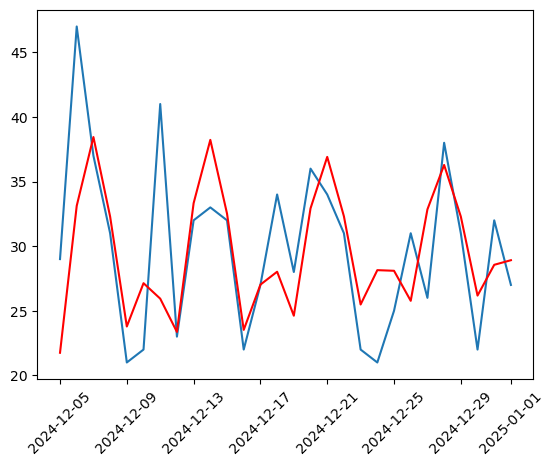

In [17]:
plt.plot(head_test)
plt.plot(head_pred,color = 'red')
plt.tick_params(axis='x', labelrotation=45)

In [18]:
# plr_res = np.random.choice([-90,180], size = 100, p = [25/37, 12/37]) 
# plt.plot(plr_res.cumsum())
# plt.plot(plr_res)

In [19]:
from sktime.forecasting.ets import AutoETS

In [20]:
forecaster_ets = AutoETS(auto=True,  n_jobs=-1, sp=7) 
forecaster_ets.fit(head_train) 

/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/l

AutoETS(auto=True, n_jobs=-1, sp=7)

In [21]:
head_pred_ets = forecaster_ets.predict(fh)

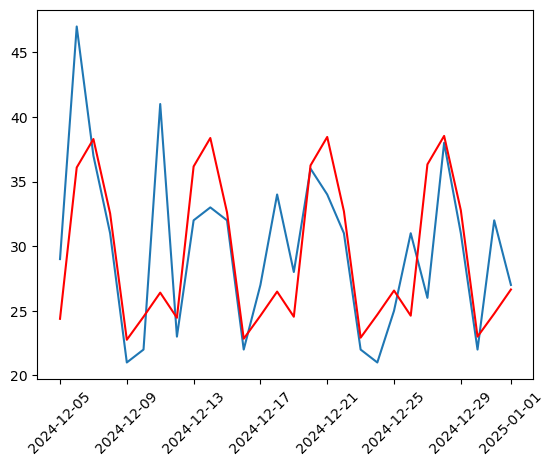

In [22]:
plt.plot(head_test)
plt.plot(head_pred_ets,color = 'red')
plt.tick_params(axis='x', labelrotation=45)

In [23]:
from sktime.datasets import load_airline
from sktime.forecasting.arima import AutoARIMA
y = load_airline()
forecaster = AutoARIMA(
    sp=12, d=0, max_p=2, max_q=2, suppress_warnings=True
)
forecaster.fit(y)
y_pred = forecaster.predict(fh=[1,2,3])